## Import libraries 
- pandas as pd: imports pandas (dataframes, CSV I/O, aggregation).
- numpy as np: imports NumPy (numerical ops, arrays).
- matplotlib.pyplot as plt: plotting API for charts.
- seaborn as sns: statistical plotting (wraps matplotlib, handy defaults).

- train_test_split: splits data into training and test sets.
- Metrics: mean_squared_error, r2_score, mean_absolute_error — evaluation functions for regression.
- LinearRegression: ordinary least squares linear model.
- StandardScaler: scales features to zero mean and unit variance (important for many ML algorithms).

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [29]:
csv_path = 'Housing.csv'   # <- update this path if necessary
learning_rate = 0.01       # GD learning rate (try 0.01, 0.005, 0.001)
epochs = 1000              # number of GD iterations
print_every = 100          # how often to print progress (set 1 to print every epoch)

# Load data into a pandas DataFrame
- A DataFrame is a powerful, two-dimensional data structure, much like a spreadsheet or a SQL table, that organizes your data into rows and columns.


In [30]:
df = pd.read_csv(csv_path)
print("Dataset shape:", df.shape)
display(df.head())

Dataset shape: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


- df.head() shows first 5 rows (useful to inspect columns quickly).

- df.info() prints summary: column names, non-null counts, dtypes — useful to check missing values and types.

- df.shape returns a tuple (n_rows, n_columns). Note: no parentheses — it's an attribute, not a method.

- df.isnull().sum() counts missing values per column.

- df.describe() returns summary statistics (count, mean, std, min, quartiles, max) for numeric columns

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [32]:
df.shape

(545, 13)

In [33]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [34]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


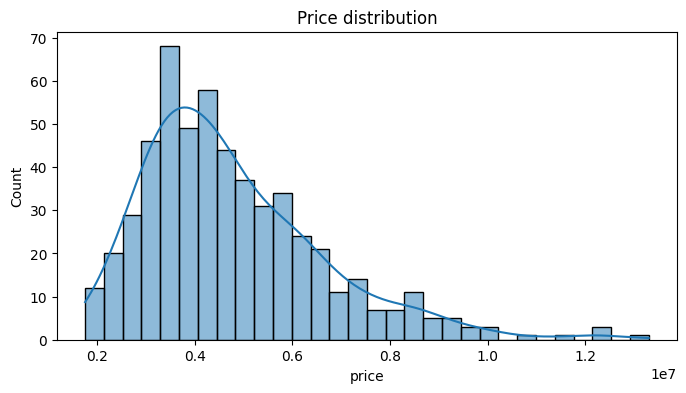

In [35]:
# Ensure numeric types for area & price
df['area'] = pd.to_numeric(df['area'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['area', 'price']).reset_index(drop=True)

plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price distribution')
plt.show()

In [48]:
X = df[['area']]   # dataframe shape (n,1)
y = df['price']    # series shape (n,)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])


Train size: 436 Test size: 109


In [49]:
sk_model = LinearRegression()
sk_model.fit(X_train, y_train)
y_pred_sk = sk_model.predict(X_test)

print("\n--- sklearn LinearRegression results ---")
print("Slope (m_sk):", sk_model.coef_[0])
print("Intercept (c_sk):", sk_model.intercept_)
print("Sklearn Test MSE:", mean_squared_error(y_test, y_pred_sk))
print("Sklearn Test MAE:", mean_absolute_error(y_test, y_pred_sk))
print("Sklearn Test R2:", r2_score(y_test, y_pred_sk))


--- sklearn LinearRegression results ---
Slope (m_sk): 425.72984193878284
Intercept (c_sk): 2512254.2639593435
Sklearn Test MSE: 3675286604768.185
Sklearn Test MAE: 1474748.1337969352
Sklearn Test R2: 0.27287851871974644


c:\Users\iamfa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


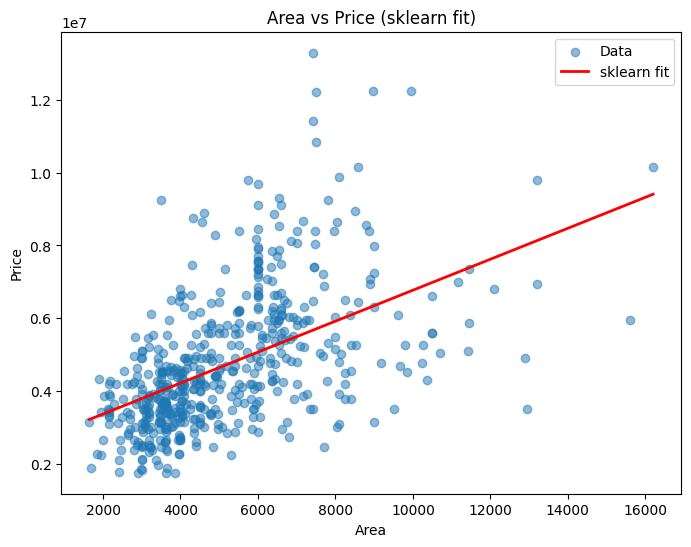

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(df['area'], df['price'], alpha=0.5, label='Data')
x_line = np.linspace(df['area'].min(), df['area'].max(), 200).reshape(-1,1)
y_line_sk = sk_model.predict(x_line)
plt.plot(x_line, y_line_sk, color='red', linewidth=2, label='sklearn fit')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price (sklearn fit)')
plt.legend()
plt.show()

In [52]:
# Prepare arrays
X_train_arr = X_train['area'].values.astype(float)
y_train_arr = y_train.values.astype(float)

# Normalize X_train (mean 0, std 1) for stable GD
X_mean = X_train_arr.mean()
X_std = X_train_arr.std()
X_train_norm = (X_train_arr - X_mean) / X_std

n = len(X_train_norm)


In [53]:
# Initialize parameters
m = 0.0
c = 0.0

# Histories
loss_history = []
r2_history = []
m_history = []
c_history = []
# Manual R2 function
def r2_score_manual(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

# Gradient Descent loop (on training set)
for epoch in range(epochs):
    # predictions for normalized X
    y_pred_epoch = m * X_train_norm + c         # shape (n,)
    error = y_train_arr - y_pred_epoch          # shape (n,)

    # gradients (MSE = mean(error^2))
    dm = -(2.0 / n) * np.sum(X_train_norm * error)
    dc = -(2.0 / n) * np.sum(error)

    # update parameters
    m = m - learning_rate * dm
    c = c - learning_rate * dc

    # compute metrics on training set using current params
    mse_epoch = np.mean(error ** 2)
    r2_epoch = r2_score_manual(y_train_arr, y_pred_epoch)

    # store histories
    loss_history.append(mse_epoch)
    r2_history.append(r2_epoch)
    m_history.append(m)
    c_history.append(c)

    # optional printing
    if (epoch % print_every == 0) or (epoch == epochs - 1):
        print(f"Epoch {epoch:4d} | Train MSE = {mse_epoch: .2f} | Train R2 = {r2_epoch: .4f} | m = {m:.6f} | c = {c:.2f}")

# Final GD params (these correspond to normalized-X units)
print("\n--- GD final parameters (normalized-X units) ---")
print("m (norm):", m)
print("c (norm):", c)

Epoch    0 | Train MSE =  25234792406487.61 | Train R2 = -7.1841 | m = 18747.305901 | c = 94130.55
Epoch  100 | Train MSE =  2609790036623.44 | Train R2 =  0.1536 | m = 815538.585277 | c = 4094833.37
Epoch  200 | Train MSE =  2211862702987.95 | Train R2 =  0.2827 | m = 921208.690888 | c = 4625404.80
Epoch  300 | Train MSE =  2204863978291.01 | Train R2 =  0.2849 | m = 935222.613366 | c = 4695768.94
Epoch  400 | Train MSE =  2204740885094.73 | Train R2 =  0.2850 | m = 937081.133541 | c = 4705100.61
Epoch  500 | Train MSE =  2204738720138.17 | Train R2 =  0.2850 | m = 937327.609661 | c = 4706338.17
Epoch  600 | Train MSE =  2204738682061.03 | Train R2 =  0.2850 | m = 937360.297215 | c = 4706502.29
Epoch  700 | Train MSE =  2204738681391.33 | Train R2 =  0.2850 | m = 937364.632224 | c = 4706524.06
Epoch  800 | Train MSE =  2204738681379.55 | Train R2 =  0.2850 | m = 937365.207131 | c = 4706526.94
Epoch  900 | Train MSE =  2204738681379.34 | Train R2 =  0.2850 | m = 937365.283375 | c = 470

In [54]:
# Convert GD params to original X units:
# If X_norm = (X - mean)/std and model is y = m*X_norm + c,
# then y = (m/std)*X + (c - m*mean/std)
m_original = m / X_std
c_original = c - (m * X_mean / X_std)
print("\n--- GD final parameters (original X units) ---")
print("m_original:", m_original)
print("c_original:", c_original)


--- GD final parameters (original X units) ---
m_original: 425.72984122229354
c_original: 2512254.2597312992


In [57]:
# Evaluate GD on the test set
X_test_arr = X_test['area'].values.astype(float)
y_test_arr = y_test.values.astype(float)
# Method A: use normalized test X with m,c (norm units)
X_test_norm = (X_test_arr - X_mean) / X_std
y_pred_test_gd = m * X_test_norm + c
# Method B (equivalent): use transformed m_original,c_original on original X
y_pred_test_gd_alt = m_original * X_test_arr + c_original

# Confirm equivalence (small floating differences possible)
assert np.allclose(y_pred_test_gd, y_pred_test_gd_alt, atol=1e-6)

print("\nGD Test MSE:", mean_squared_error(y_test_arr, y_pred_test_gd))
print("GD Test MAE:", mean_absolute_error(y_test_arr, y_pred_test_gd))
print("GD Test R2:", r2_score(y_test_arr, y_pred_test_gd))


GD Test MSE: 3675286610877.4263
GD Test MAE: 1474748.1337220964
GD Test R2: 0.2728785175110897


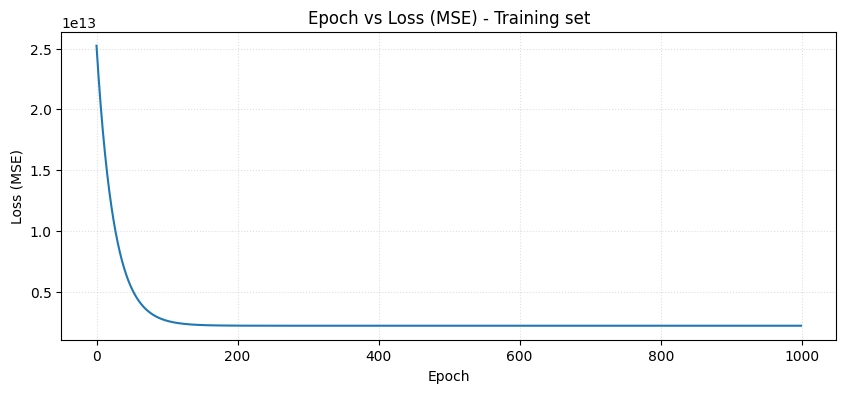

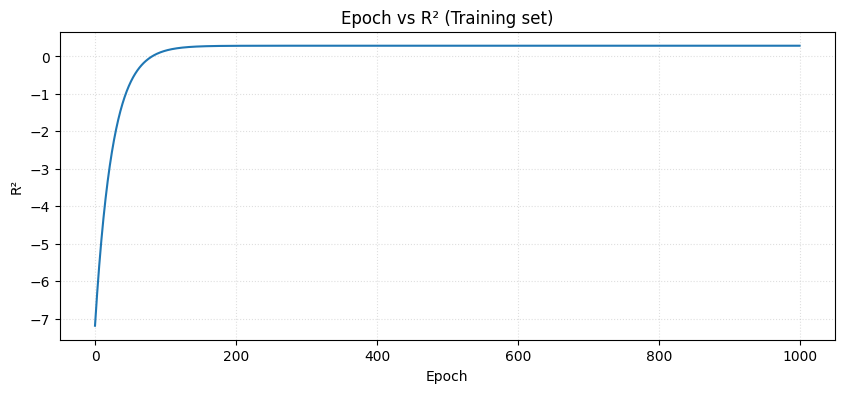

In [58]:
epochs_range = np.arange(epochs)

plt.figure(figsize=(10,4))
plt.plot(epochs_range, loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Epoch vs Loss (MSE) - Training set')
plt.grid(True, linestyle=':', alpha=0.4)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(epochs_range, r2_history)
plt.xlabel('Epoch')
plt.ylabel('R²')
plt.title('Epoch vs R² (Training set)')
plt.grid(True, linestyle=':', alpha=0.4)
plt.show()


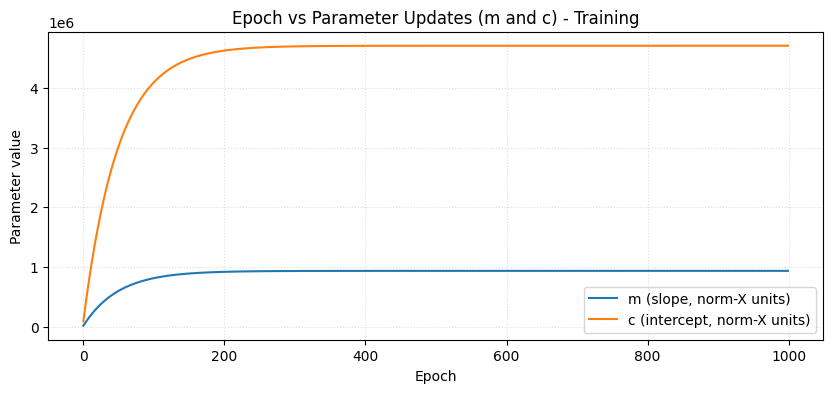

In [59]:
plt.figure(figsize=(10,4))
plt.plot(epochs_range, m_history, label='m (slope, norm-X units)')
plt.plot(epochs_range, c_history, label='c (intercept, norm-X units)')
plt.xlabel('Epoch')
plt.ylabel('Parameter value')
plt.title('Epoch vs Parameter Updates (m and c) - Training')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.4)
plt.show()


c:\Users\iamfa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: x and y must have same first dimension, but have shapes (300,) and (200,)

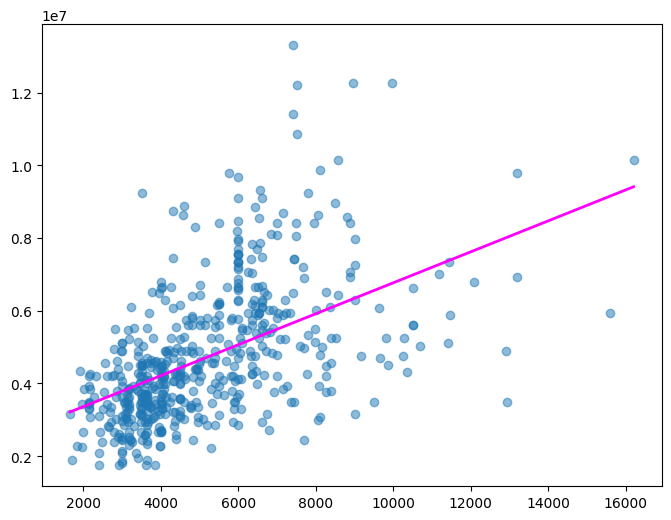

In [60]:
x_line_orig = np.linspace(df['area'].min(), df['area'].max(), 300)
y_line_gd_orig = m_original * x_line_orig + c_original
y_line_sk_orig = sk_model.predict(x_line.reshape(-1,1))

plt.figure(figsize=(8,6))
plt.scatter(df['area'], df['price'], alpha=0.5, label='Data')
plt.plot(x_line_orig, y_line_gd_orig, color='magenta', linewidth=2, label='GD fitted line (transformed)')
plt.plot(x_line_orig, y_line_sk_orig, color='red', linestyle='--', linewidth=2, label='sklearn fit')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price: Data, sklearn fit, GD fit')
plt.legend()
plt.show()

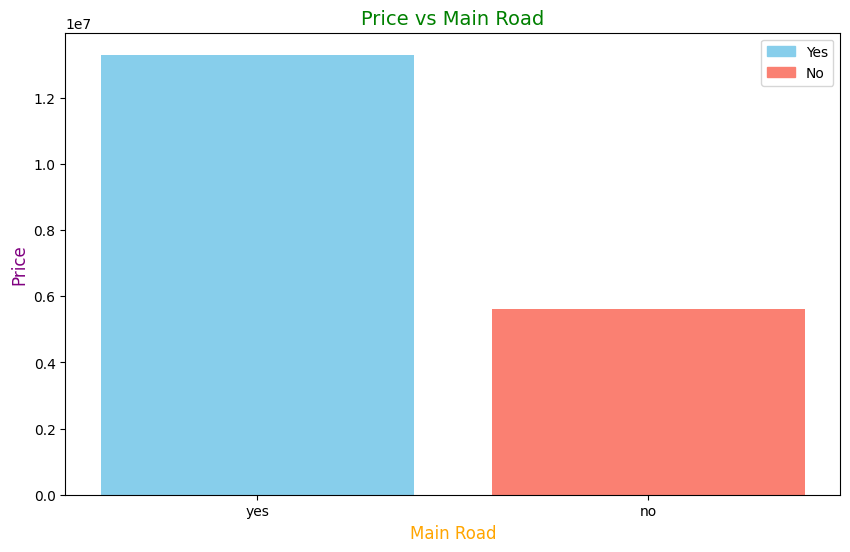

In [36]:
import matplotlib.patches as mpatches

# Assign colors based on mainroad values
colors = df['mainroad'].map({'yes': 'skyblue', 'no': 'salmon'})

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(df['mainroad'], df['price'], color=colors)

# Labels and title
plt.xlabel('Main Road', fontsize=12, color='orange')
plt.ylabel('Price', fontsize=12, color='purple')
plt.title('Price vs Main Road', fontsize=14, color='green')

# Add legend
yes_patch = mpatches.Patch(color='skyblue', label='Yes')
no_patch = mpatches.Patch(color='salmon', label='No')
plt.legend(handles=[yes_patch, no_patch])

# Show plot
plt.show()


- pd.to_numeric(..., errors='coerce'): forces conversion to numbers; invalid entries become NaN.

- df.dropna(...): removes rows where area or price are missing so plots and stats are valid.

- plt.scatter(...): raw points — shows spread and outliers.

- sns.regplot(...): draws scatter and fits/draws a straight (least-squares) line.

- df['area'].corr(df['price']): Pearson correlation (–1..1) measures linear association.

- LinearRegression() + fit(...): fits simple linear model price = intercept + coef * area.

- mean_absolute_error, mean_squared_error, r2_score: common model metrics.

- pd.cut(...) + groupby(...): aggregate average price per area bucket — good for smoothing/noisy data.

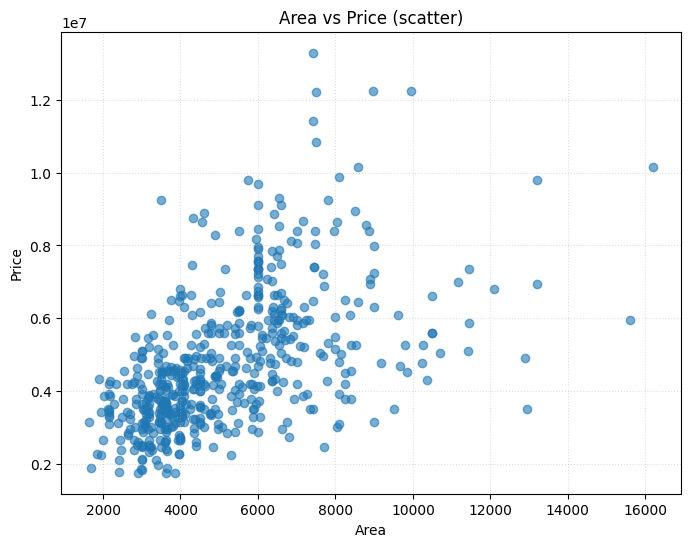

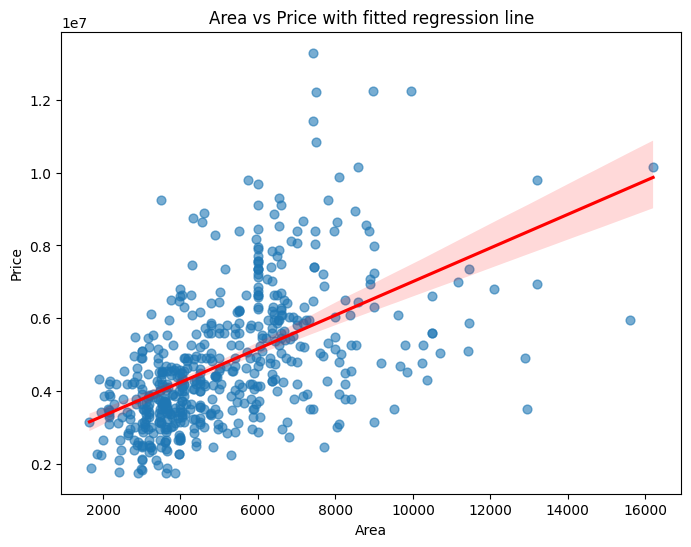

Pearson correlation (area, price): 0.536
Linear model coefficients:
  intercept: 2512254.2639593435
  coef (area): 425.72984193878284
MAE: 1474748.13, RMSE: 1917103.70, R2: 0.273


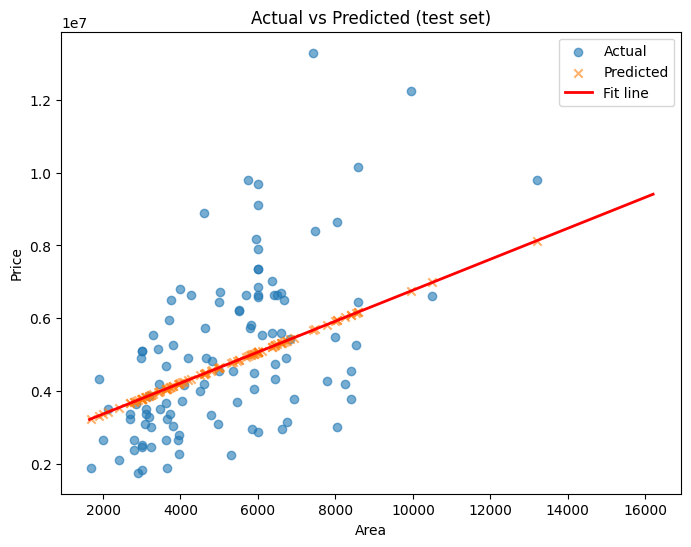

C:\Users\iamfa\AppData\Local\Temp\ipykernel_20200\2751797885.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area_means = df.groupby('area_bin')['price'].mean().sort_index()


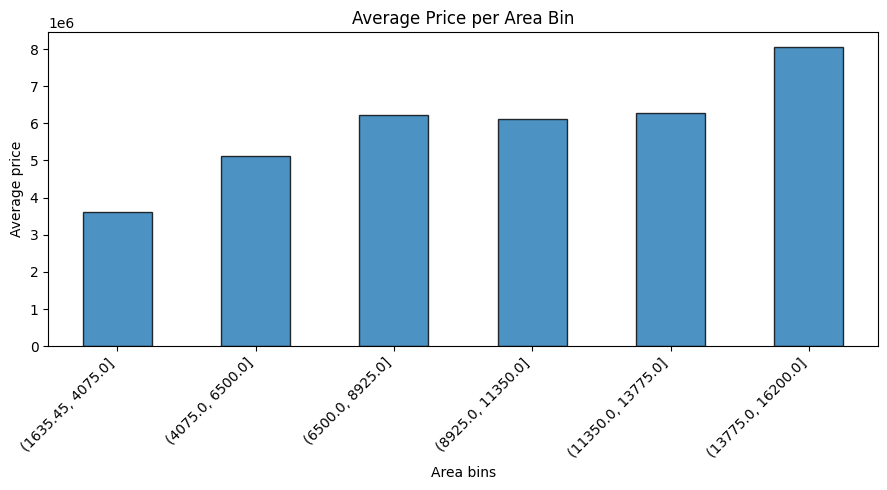

In [37]:
# --- ensure area and price are numeric ---
df['area'] = pd.to_numeric(df['area'], errors='coerce')   # convert, NaN if bad
df['price'] = pd.to_numeric(df['price'], errors='coerce') # convert, NaN if bad

# drop rows with missing area or price (or handle as you prefer)
df = df.dropna(subset=['area', 'price']).reset_index(drop=True)

# --- 1) Simple scatter plot (raw points) ---
plt.figure(figsize=(8,6))
plt.scatter(df['area'], df['price'], alpha=0.6)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price (scatter)')
plt.grid(True, linestyle=':', alpha=0.4)
plt.show()

# --- 2) Scatter with linear fit (Seaborn regplot) ---
plt.figure(figsize=(8,6))
sns.regplot(x='area', y='price', data=df, scatter_kws={'alpha':0.6, 's':40}, line_kws={'color':'red'})
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price with fitted regression line')
plt.show()

# --- 3) Pearson correlation (single number) ---
corr = df['area'].corr(df['price'])
print(f"Pearson correlation (area, price): {corr:.3f}")

# --- 4) Fit a simple linear regression (area -> price) and evaluate ---
X = df[['area']].values    # 2D array for sklearn
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear model coefficients:")
print("  intercept:", model.intercept_)
print("  coef (area):", model.coef_[0])
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.3f}")

# Optional: plot test actual vs predicted (visual)
plt.figure(figsize=(8,6))
plt.scatter(X_test.flatten(), y_test, label='Actual', alpha=0.6)
plt.scatter(X_test.flatten(), y_pred, label='Predicted', alpha=0.6, marker='x')
# draw fitted line across whole range for reference
x_line = np.linspace(df['area'].min(), df['area'].max(), 100).reshape(-1,1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='red', linewidth=2, label='Fit line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Actual vs Predicted (test set)')
plt.legend()
plt.show()

# --- 5) Binned average price by area (useful if area values cluster) ---
# create 6 equal-width bins (choose bins= or pd.qcut for quantiles)
df['area_bin'] = pd.cut(df['area'], bins=6)
area_means = df.groupby('area_bin')['price'].mean().sort_index()

plt.figure(figsize=(9,5))
area_means.plot(kind='bar', edgecolor='k', alpha=0.8)
plt.xlabel('Area bins')
plt.ylabel('Average price')
plt.title('Average Price per Area Bin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


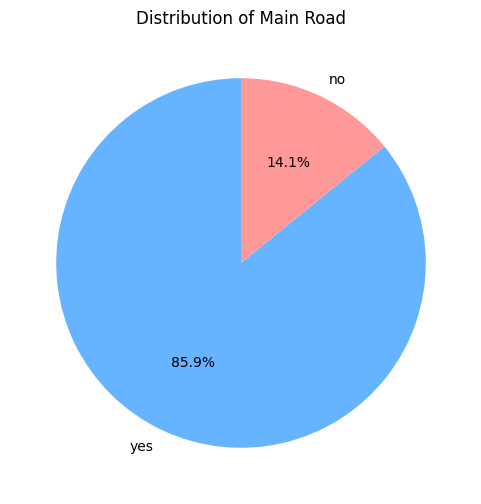

In [38]:

# Get the value counts for the selected column
value_counts = df['mainroad'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    value_counts,
    labels=value_counts.index,
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff9999'],
    startangle=90
)

# Add title
plt.title("Distribution of Main Road")

# Show plot
plt.show()


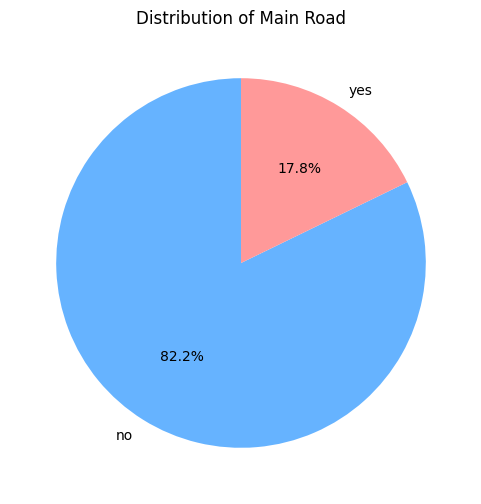

In [39]:

# Get the value counts for the selected column
value_counts = df['guestroom'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    value_counts,
    labels=value_counts.index,
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff9999'],
    startangle=90
)

# Add title
plt.title("Distribution of Main Road")

# Show plot
plt.show()


In [40]:
features = ['area', 'bedrooms', 'bathrooms', 'stories']
target = 'price'
# Assuming your dataset is in 'df'
X = df[features]
y = df[target]

In [41]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [42]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
# Predictions
y_pred = model.predict(X_test)


In [45]:
# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 1158970.480316688
Mean Squared Error (MSE): 2457741642022.09
Root Mean Squared Error (RMSE): 1567718.610600158
R² Score: 0.5137585349037066


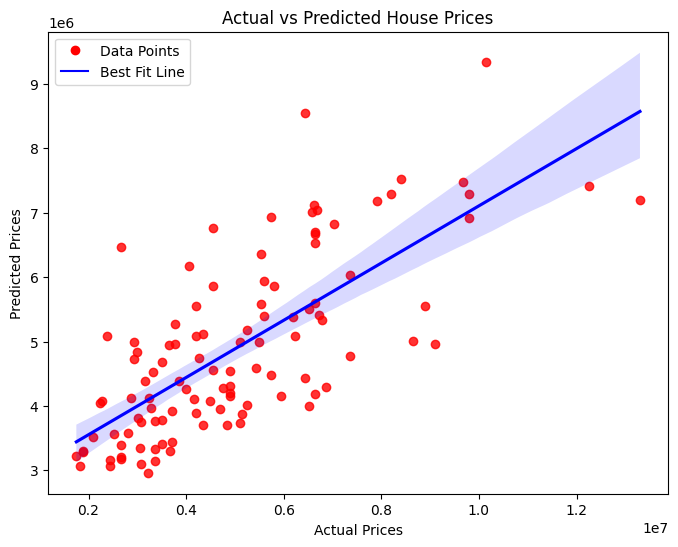

In [46]:

# Scatter plot with line of best fit
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter=True, color='red', line_kws={"color":"blue"})

# Labels and title
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")

# Add legend manually
plt.plot([], [], 'ro', label="Data Points")
plt.plot([], [], 'b-', label="Best Fit Line")
plt.legend()

# Show plot
plt.show()

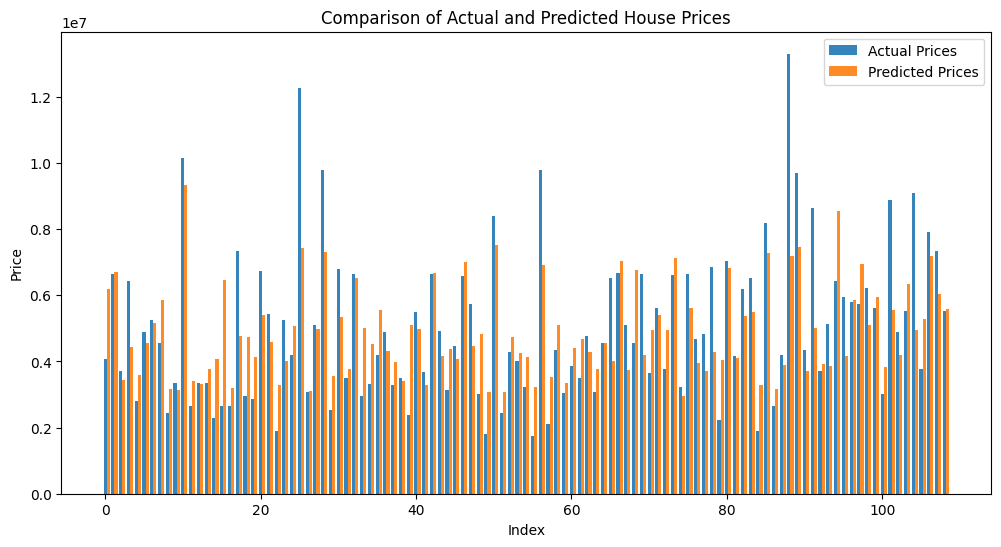

In [47]:
# Bar graph visualization
plt.figure(figsize=(12, 6))
indices = np.arange(len(y_test))

plt.bar(indices, y_test.values, width=0.4, alpha=0.9, label="Actual Prices")
plt.bar(indices + 0.4, y_pred, width=0.4, alpha=0.9, label="Predicted Prices")

# Labels and title
plt.xlabel("Index")
plt.ylabel("Price")
plt.title("Comparison of Actual and Predicted House Prices")
plt.legend()

# Show plot
plt.show()